In [1]:
import numpy as np #importe de libreria
from matplotlib import pyplot as plt #pa plotear
from PIL import Image


In [2]:
# img=plt.imread('mamo.png')
# plt.imshow(img,cmap='gray')

In [3]:
# img=Image.open('mamo.png')
img=Image.open('manox.png').convert('L')
pix_val=list(img.getdata())


In [4]:
print("Maximo= ", np.max(pix_val))
print("Minimo= ", np.min(pix_val))

Maximo=  255
Minimo=  0


In [5]:

img=np.array(img)
[n,m]=img.shape
print(n)
print(m)
#convertimos imagen en matriz

1024
896


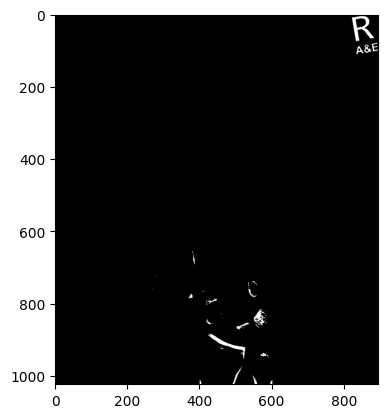

In [6]:
#umbralizacion 
bw_img=np.zeros(img.shape)

for i in range(n):
    for j in range(m):
        if img[i,j]>200:
            bw_img[i,j]=1
        else:
         bw_img[i,j]=0
plt.imshow(bw_img,cmap='gray')

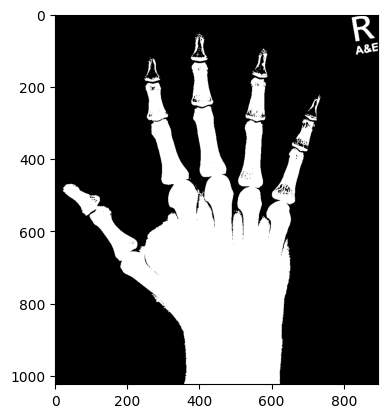

In [7]:
import cv2

umbral,img_bin=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_bin,cmap='gray')

Islas numero =  69


(-0.5, 895.5, 1023.5, -0.5)

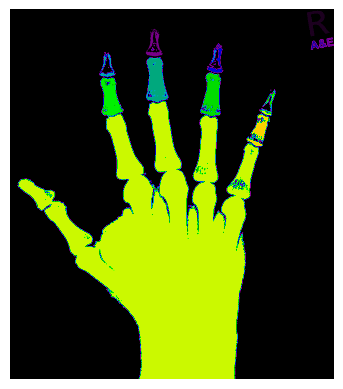

In [8]:
from skimage import measure
blobs_labels = measure.label(img_bin, background=0)

plt.imshow(blobs_labels, cmap="nipy_spectral")
print("Islas numero = ",np.max(blobs_labels))
plt.axis("off")

[[1 1 1]
 [1 1 1]
 [1 1 1]]


(-0.5, 895.5, 1023.5, -0.5)

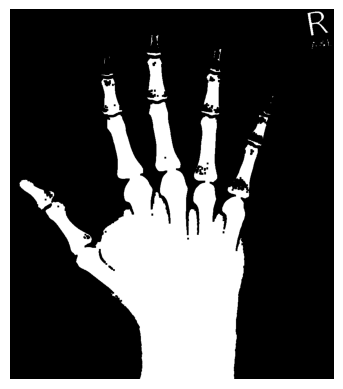

In [9]:
kernel = np.ones((3,3), np.uint8)
print(kernel)
img_eroded = cv2.erode(img_bin, kernel, iterations=2)
plt.imshow(img_eroded, cmap="gray")
plt.axis("off")

Umbral Otsu =  72.0
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Cantidad de islas =  2


(-0.5, 895.5, 1023.5, -0.5)

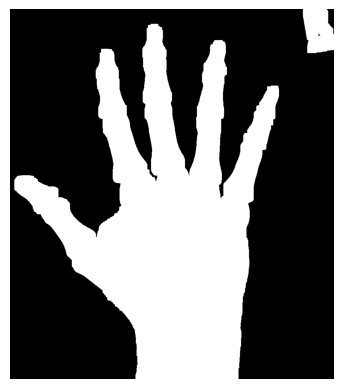

In [10]:
umbral,img_bw = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Umbral Otsu = ", umbral)
plt.imshow(img_bw,cmap="gray")
kernel = np.ones((5,5),np.uint8)
print(kernel)
img_dilate = cv2.dilate(img_bw,kernel,iterations=5)
plt.imshow(img_dilate,cmap="gray")
blobs_labels = measure.label(img_dilate,background=0)
print("Cantidad de islas = ", np.max(blobs_labels))
plt.axis("off")

(-0.5, 895.5, 1023.5, -0.5)

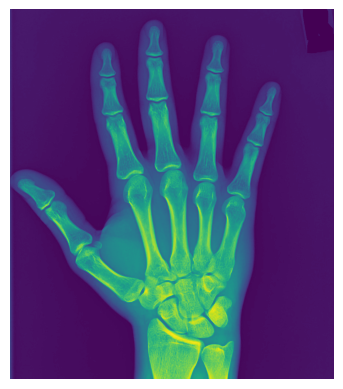

In [11]:
mask = np.where(blobs_labels==1, 0,1)
mask = np.logical_not(mask)
img_mask = np.copy(img)
img_mask[mask] = 0
plt.imshow(img_mask)
plt.axis("off")